In [1]:
from dependence import ImpactOfDependence
import numpy as np
import openturns as ot
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
def add_function(x):
    """
    """
    return x.sum(axis=1)

In [14]:
dim = 4
alpha = 0.05
threshold = 2.
K = 100
n = 10000
measure = "KendallTau"
margins = [ot.Normal()]*dim
families = np.zeros((dim, dim), dtype=int)
for i in range(dim):
    for j in range(i):
        families[i, j] = 1

## Classic

-5.8426910584148199

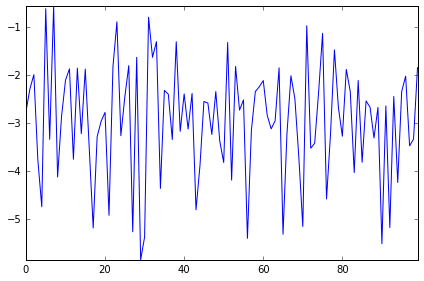

In [15]:
impact = ImpactOfDependence(model_func=add_function, margins=margins, families=families)

impact.run(100, n, fixed_grid=False)
quant_res = impact.compute_quantiles(alpha)

id_min = quant_res.quantity.argmin()
fig, ax = plt.subplots()
ax.plot(quant_res.quantity)
ax.axis('tight')
fig.tight_layout()
quant_res.quantity[id_min]

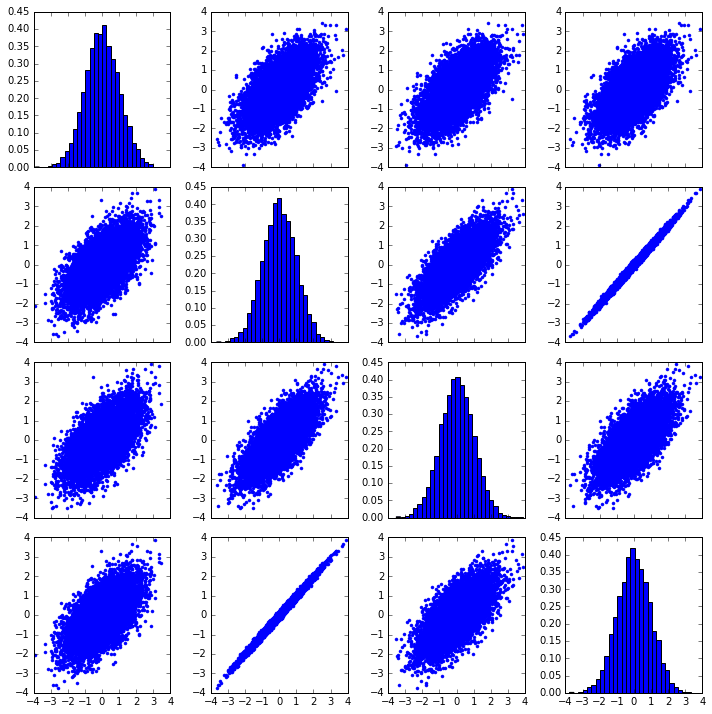

In [16]:
impact.draw_matrix_plot(id_min, copula_space=False)

## Fréchet-Hoeffding bounds

-6.7112321040406018

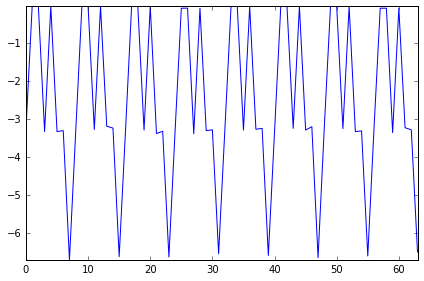

In [17]:
impact = ImpactOfDependence(model_func=add_function, margins=margins, families=families)

impact.minmax_run(n)
quant_res = impact.compute_quantiles(alpha)

id_min = quant_res.quantity.argmin()
fig, ax = plt.subplots()
ax.plot(quant_res.quantity)
ax.axis('tight')
fig.tight_layout()
quant_res.quantity[id_min]

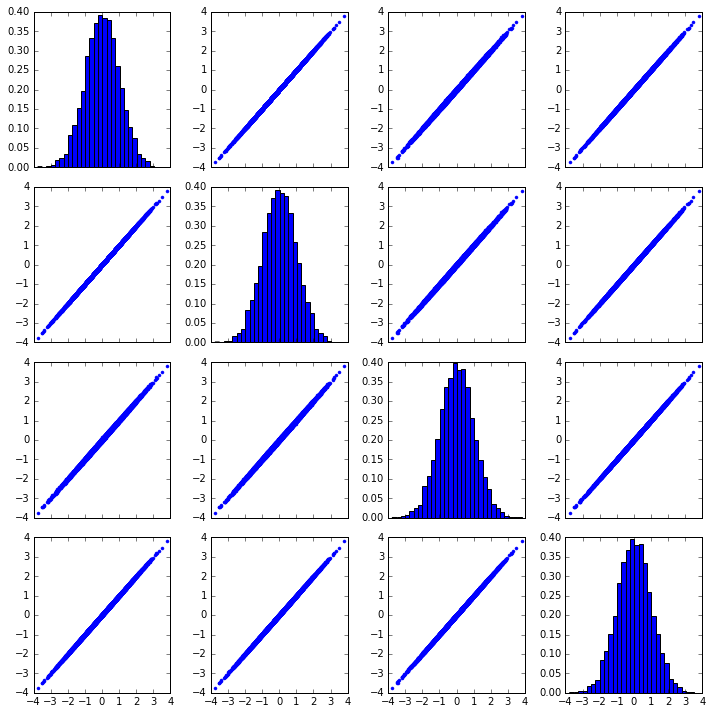

In [18]:
impact.draw_matrix_plot(id_min, copula_space=False)

## Changing the copula structure

In [19]:
structure = np.zeros((dim, dim), dtype=int)
structure[0, 0] = 3
structure[1, 1] = 2
structure[2, 2] = 1
structure[3, 3] = 4
structure[1, 0] = 2
structure[2, 0] = 1
structure[3, 0] = 4
structure[2, 1] = 1
structure[3, 1] = 4
structure[3, 2] = 4
structure

array([[3, 0, 0, 0],
       [2, 2, 0, 0],
       [1, 1, 1, 0],
       [4, 4, 4, 4]])

-6.7025177643966218

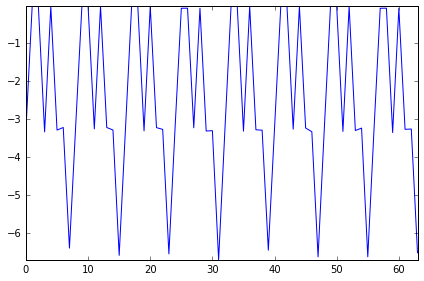

In [20]:
impact = ImpactOfDependence(model_func=add_function, margins=margins, families=families, 
                            vine_structure=structure)

impact.minmax_run(n)
quant_res = impact.compute_quantiles(alpha)

id_min = quant_res.quantity.argmin()
fig, ax = plt.subplots()
ax.plot(quant_res.quantity)
ax.axis('tight')
fig.tight_layout()
quant_res.quantity[id_min]

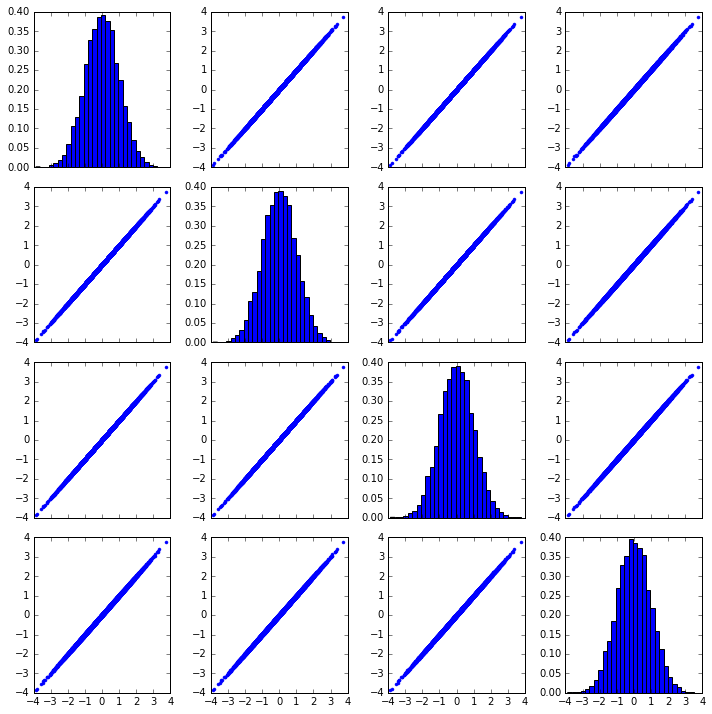

In [21]:
impact.draw_matrix_plot(id_min, copula_space=False)

## Now we change the model function

In [148]:
dim = 4
alpha = 0.05
threshold = 2.
K = 100
n = 10000
measure = "KendallTau"
margins = [ot.Normal()]*dim
families = np.zeros((dim, dim), dtype=int)
for i in range(dim):
    for j in range(i):
        families[i, j] = 1

In [149]:
def add_function_2(x):
    """
    """
    n, d = x.shape
    tmp = np.ones((d, ))
    tmp[1::2] = -1
    return (x * tmp).sum(axis=1)

-6.7027880457893154

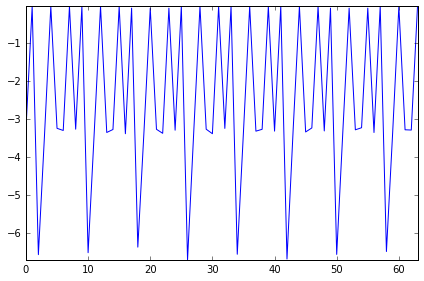

In [150]:
impact = ImpactOfDependence(model_func=add_function_2, margins=margins, families=families)

impact.minmax_run(n)
quant_res = impact.compute_quantiles(alpha)

id_min = quant_res.quantity.argmin()
fig, ax = plt.subplots()
ax.plot(quant_res.quantity)
ax.axis('tight')
fig.tight_layout()
quant_res.quantity[id_min]

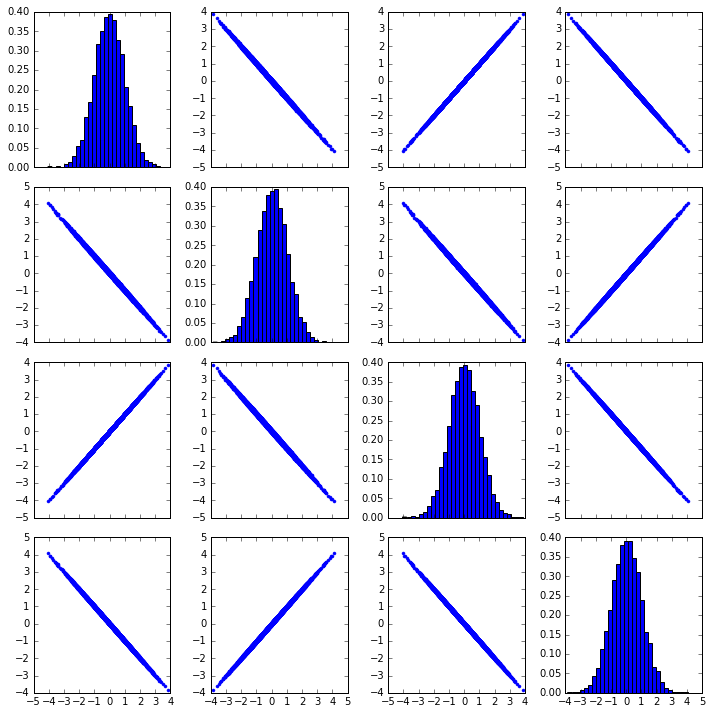

In [151]:
impact.draw_matrix_plot(id_min, copula_space=False)

# Non monotonic function

In [163]:
dim = 2
alpha = 0.05
threshold = 2.
K = 100
n = 10000
measure = "KendallTau"
margins = [ot.Normal()]*dim
families = np.zeros((dim, dim), dtype=int)
for i in range(dim):
    for j in range(i):
        families[i, j] = 1

In [167]:
def non_linear_function(x):
    """
    """
    return (x**3).sum(axis=1) - (x**2).sum(axis=1)

-14.232315323861746

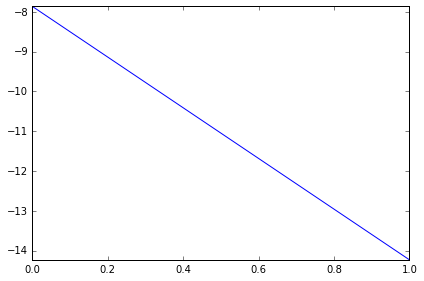

In [168]:
impact = ImpactOfDependence(model_func=non_linear_function, margins=margins, families=families)

impact.minmax_run(n)
quant_res = impact.compute_quantiles(alpha)

id_min = quant_res.quantity.argmin()
fig, ax = plt.subplots()
ax.plot(quant_res.quantity)
ax.axis('tight')
fig.tight_layout()
quant_res.quantity[id_min]

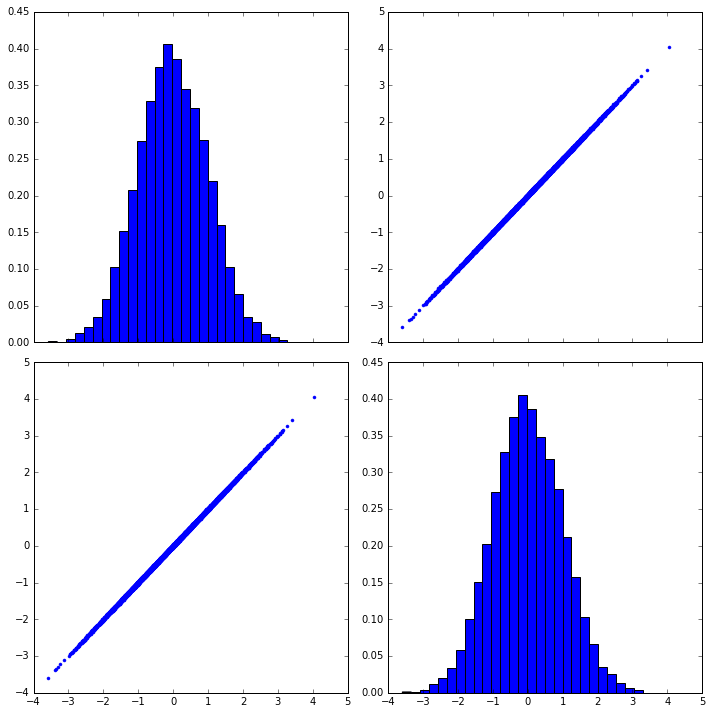

In [169]:
impact.draw_matrix_plot(id_min, copula_space=False)